In [1]:
from trajectree.fock_optics.utils import *
from trajectree.fock_optics.light_sources import *
from trajectree.fock_optics.devices import *
from trajectree.fock_optics.measurement import *
from trajectree.fock_optics.outputs import *

import time
import json
import numpy as np

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [6]:
# params
trunc = 5
N = trunc+1
error_tolerance = 1e-12

mean_photon_num = (0.25)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
# psi = new_ls(N, mean_photon_num, error_tolerance) 

read_quantum_state(psi, N, num_states = 2)

idler_angles = np.linspace(0, np.pi, 10)
signal_angles = np.linspace(0, 2*np.pi, 10)

Corresponding Basis terms:
0H0V_B 0H0V_A - 0 - [0.94001485-0.j]
0H1V_B 0H1V_A - 37 - [-0.+0.23022718j]
0H2V_B 0H2V_A - 74 - [-0.05638687+0.j]
0H3V_B 0H3V_A - 111 - [-0.-0.013811j]
0H4V_B 0H4V_A - 148 - [0.00337538-0.j]
0H5V_B 0H5V_A - 185 - [0.+0.00087241j]
1H0V_B 1H0V_A - 222 - [0.+0.23022718j]
1H1V_B 1H1V_A - 259 - [-0.05638693+0.j]
1H2V_B 1H2V_A - 296 - [-0.-0.0138102j]
1H3V_B 1H3V_A - 333 - [0.00338257-0.j]
1H4V_B 1H4V_A - 370 - [0.+0.00082669j]
1H5V_B 1H5V_A - 407 - [-0.00021367-0.j]
2H0V_B 2H0V_A - 444 - [-0.05638687-0.j]
2H1V_B 2H1V_A - 481 - [-0.-0.0138102j]
2H2V_B 2H2V_A - 518 - [0.00338237-0.j]
2H3V_B 2H3V_A - 555 - [-0.+0.00082845j]
2H4V_B 2H4V_A - 592 - [-0.00020247-0.j]
2H5V_B 2H5V_A - 629 - [0.-5.23315e-05j]
3H0V_B 3H0V_A - 666 - [-0.-0.013811j]
3H1V_B 3H1V_A - 703 - [0.00338257-0.j]
3H2V_B 3H2V_A - 740 - [0.+0.00082845j]
3H3V_B 3H3V_A - 777 - [-0.00020292+0.j]
3H4V_B 3H4V_A - 814 - [-0.-4.95922e-05j]
3H5V_B 3H5V_A - 851 - [1.28177e-05-0.j]
4H0V_B 4H0V_A - 888 - [0.003375

Corresponding Basis terms:
0H0V_B 0H0V_A - 0 - [0.94001485-0.j]
0H1V_B 0H1V_A - 37 - [-0.+0.23022718j]
0H2V_B 0H2V_A - 74 - [-0.05638687+0.j]
0H3V_B 0H3V_A - 111 - [-0.-0.013811j]
0H4V_B 0H4V_A - 148 - [0.00337538-0.j]
0H5V_B 0H5V_A - 185 - [0.+0.00087241j]
1H0V_B 1H0V_A - 222 - [0.+0.23022718j]
1H1V_B 1H1V_A - 259 - [-0.05638693+0.j]
1H2V_B 1H2V_A - 296 - [-0.-0.0138102j]
1H3V_B 1H3V_A - 333 - [0.00338257-0.j]
1H4V_B 1H4V_A - 370 - [0.+0.00082669j]
1H5V_B 1H5V_A - 407 - [-0.00021367-0.j]
2H0V_B 2H0V_A - 444 - [-0.05638687-0.j]
2H1V_B 2H1V_A - 481 - [-0.-0.0138102j]
2H2V_B 2H2V_A - 518 - [0.00338237-0.j]
2H3V_B 2H3V_A - 555 - [-0.+0.00082845j]
2H4V_B 2H4V_A - 592 - [-0.00020247-0.j]
2H5V_B 2H5V_A - 629 - [0.-5.23315e-05j]
3H0V_B 3H0V_A - 666 - [-0.-0.013811j]
3H1V_B 3H1V_A - 703 - [0.00338257-0.j]
3H2V_B 3H2V_A - 740 - [0.+0.00082845j]
3H3V_B 3H3V_A - 777 - [-0.00020292+0.j]
3H4V_B 3H4V_A - 814 - [-0.-4.95922e-05j]
3H5V_B 3H5V_A - 851 - [1.28177e-05-0.j]
4H0V_B 4H0V_A - 888 - [0.003375

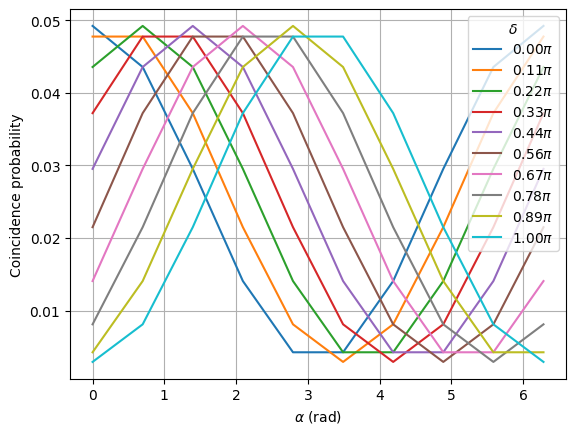

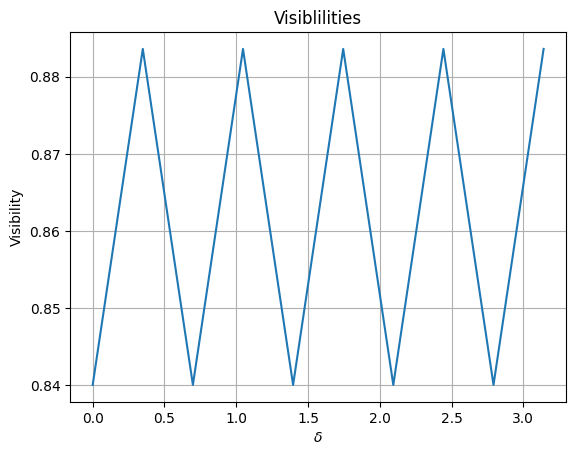

In [7]:
start = time.time()

read_quantum_state(psi, N, num_states = 2)

coincidence_PNR = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, rotations = {"signal":(0,1), "idler":(2,3)}, measurements = {1:(0,2), 0:(1,3)}, pnr = False, det_outcome = 1, compress=True, contract=True, draw = False)

fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles)

print(time.time()-start)